# Tutorial on getting hands on the event data for a single match.
-----


*author: aliha*

*twitter: @rockingAli5* 


# Import modules

In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
import main
import visuals
import seaborn as sns

# Get match data

In [2]:
if __name__ == "__main__":
    driver = webdriver.Chrome('chromedriver.exe')
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://www.whoscored.com/Matches/1491995/Live/Spain-LaLiga-2020-2021-Barcelona-Sevilla"
match_data = main.getMatchData(driver, url, close_window=False)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# Add xG data to events dataframe
events_df = main.getxGFromUnderstat(match_data, events_df, driver)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Spain, League: LaLiga, Season: 2020/2021, Match Id: 1491995


# Calculate EPV for successful passes

In [3]:
events_df = main.addEpvToDataFrame(events_df)

# Get data for multiple matches

## getting competition urls

In [4]:
league_urls = main.getLeagueUrls()
league_urls

{'Premier League': 'https://1xbet.whoscored.com/Regions/252/Tournaments/2/England-Premier-League',
 'Serie A': 'https://1xbet.whoscored.com/Regions/108/Tournaments/5/Italy-Serie-A',
 'LaLiga': 'https://1xbet.whoscored.com/Regions/206/Tournaments/4/Spain-LaLiga',
 'Bundesliga': 'https://1xbet.whoscored.com/Regions/81/Tournaments/3/Germany-Bundesliga',
 'Ligue 1': 'https://1xbet.whoscored.com/Regions/74/Tournaments/22/France-Ligue-1',
 'Liga NOS': 'https://1xbet.whoscored.com/Regions/177/Tournaments/21/Portugal-Liga-NOS',
 'Eredivisie': 'https://1xbet.whoscored.com/Regions/155/Tournaments/13/Netherlands-Eredivisie',
 'Russian Premier League': 'https://1xbet.whoscored.com/Regions/182/Tournaments/77/Russia-Premier-League',
 'Brasileirão': 'https://1xbet.whoscored.com/Regions/31/Tournaments/95/Brazil-Brasileir%C3%A3o',
 'Major League Soccer': 'https://1xbet.whoscored.com/Regions/233/Tournaments/85/USA-Major-League-Soccer',
 'Super Lig': 'https://1xbet.whoscored.com/Regions/225/Tournaments/1

## getting match urls for that competition and season

In [5]:
match_urls = main.getMatchUrls(comp_url=league_urls['LaLiga'], season='2020/2021')
match_urls

[{'date': 'Sep 12 2020',
  'time': '15:00',
  'home': 'Eibar',
  'away': 'Celta Vigo',
  'score': '0 : 0',
  'url': '/Matches/1491956/Live/Spain-LaLiga-2020-2021-Eibar-Celta-Vigo'},
 {'date': 'Sep 12 2020',
  'time': '17:30',
  'home': 'Granada',
  'away': 'Athletic Bilbao',
  'score': '2 : 0',
  'url': '/Matches/1491958/Live/Spain-LaLiga-2020-2021-Granada-Athletic-Bilbao'},
 {'date': 'Sep 12 2020',
  'time': '20:00',
  'home': 'Cadiz',
  'away': 'Osasuna',
  'score': '0 : 2',
  'url': '/Matches/1491957/Live/Spain-LaLiga-2020-2021-Cadiz-Osasuna'},
 {'date': 'Sep 13 2020',
  'time': '13:00',
  'home': 'Deportivo Alaves',
  'away': 'Real Betis',
  'score': '0 : 1',
  'url': '/Matches/1491953/Live/Spain-LaLiga-2020-2021-Deportivo-Alaves-Real-Betis'},
 {'date': 'Sep 13 2020',
  'time': '15:00',
  'home': 'Real Valladolid',
  'away': 'Real Sociedad',
  'score': '1 : 1',
  'url': '/Matches/1491961/Live/Spain-LaLiga-2020-2021-Real-Valladolid-Real-Sociedad'},
 {'date': 'Sep 13 2020',
  'time':

## getting match urls for a specific team

In [6]:
team_urls = main.getTeamUrls(team='Barcelona', match_urls=match_urls)
team_urls

[{'date': 'Sep 27 2020',
  'time': '20:00',
  'home': 'Barcelona',
  'away': 'Villarreal',
  'score': '4 : 0',
  'url': '/Matches/1491975/Live/Spain-LaLiga-2020-2021-Barcelona-Villarreal'},
 {'date': 'Oct 1 2020',
  'time': '20:30',
  'home': 'Celta Vigo',
  'away': 'Barcelona',
  'score': '0 : 3',
  'url': '/Matches/1491984/Live/Spain-LaLiga-2020-2021-Celta-Vigo-Barcelona'},
 {'date': 'Oct 4 2020',
  'time': '20:00',
  'home': 'Barcelona',
  'away': 'Sevilla',
  'score': '1 : 1',
  'url': '/Matches/1491995/Live/Spain-LaLiga-2020-2021-Barcelona-Sevilla'},
 {'date': 'Oct 17 2020',
  'time': '20:00',
  'home': 'Getafe',
  'away': 'Barcelona',
  'score': '1 : 0',
  'url': '/Matches/1492021/Live/Spain-LaLiga-2020-2021-Getafe-Barcelona'},
 {'date': 'Oct 24 2020',
  'time': '15:00',
  'home': 'Barcelona',
  'away': 'Real Madrid',
  'score': '1 : 3',
  'url': '/Matches/1492033/Live/Spain-LaLiga-2020-2021-Barcelona-Real-Madrid'},
 {'date': 'Oct 31 2020',
  'time': '20:00',
  'home': 'Deportivo

## getting match data for the required urls

In [9]:
# eg. first 5 matches of Barcelona
matches_data = main.getMatchesData(match_urls=team_urls[:5])

Getting Match Data: 100%|████████████████████████████████████████████████████████████████| 5/5 [00:26<00:00,  5.36s/it]


# Get pass data for a team

## All passes 

In [10]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Get Player Names
team_players_dict = {}
for player in matches_df[venue][match_data['matchId']]['players']:
    team_players_dict[player['playerId']] = player['name'] 
    
# Total Passes
# passes_df['playerId'] = passes_df['playerId'].astype(int)
passes_df = events_df.loc[[row['displayName'] == 'Pass' for row in list(events_df['type'])]].reset_index(drop=True)
passes_df = passes_df.loc[[row['displayName'] == 'Successful' for row in list(passes_df['outcomeType'])]].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['teamId'] == teamId].reset_index(drop=True)
passes_df.insert(27, column='playerName', value=[team_players_dict[i] for i in list(passes_df['playerId'])])

passes_df

id  eventId  minute  second  teamId     x     y  \
0    2.219390e+09        3       0     0.0      65  50.0  50.0   
1    2.219390e+09        4       0     1.0      65  39.6  47.5   
2    2.219390e+09        5       0     3.0      65  40.5  62.4   
3    2.219390e+09        6       0     6.0      65  29.1  64.4   
4    2.219390e+09        7       0     7.0      65  25.0  40.0   
..            ...      ...     ...     ...     ...   ...   ...   
589  2.219448e+09      972      94    42.0      65  46.4  89.0   
590  2.219448e+09      973      94    45.0      65  32.6  68.6   
591  2.219448e+09      974      94    49.0      65  17.4  44.5   
592  2.219448e+09      977      94    57.0      65  52.2   0.0   
593  2.219448e+09      978      95     0.0      65  52.0  19.0   

     expandedMinute                                     period  \
0                 0   {'value': 1, 'displayName': 'FirstHalf'}   
1                 0   {'value': 1, 'displayName': 'FirstHalf'}   
2                 0   {'value': 1, 'displayName': 'FirstHalf'}   
3                 0   {'value': 1, 'displayName': 'FirstHalf'}   
4                 0   {'value': 1, 'displayName': 'FirstHalf'}   
..              ...                                        ...   
589              95  {'value': 2, 'displayName': 'SecondHalf'}   
590              95  {'value': 2, 'displayName': 'SecondHalf'}   
591              95  {'value': 2, 'displayName': 'SecondHalf'}   
592              95  {'value': 2, 'displayName': 'SecondHalf'}   
593              96  {'value': 2, 'displayName': 'SecondHalf'}   

                                    type  ... relatedPlayerId goalMouthZ  \
0    {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
1    {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
2    {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
3    {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
4    {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
..                                   ...  ...             ...        ...   
589  {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
590  {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
591  {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
592  {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
593  {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   

    goalMouthY  isShot  blockedX blockedY isGoal cardType  xG EPV_difference  
0          NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0015  
1          NaN     NaN       NaN      NaN    NaN      NaN NaN         0.0007  
2          NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0027  
3          NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0005  
4          NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0018  
..         ...     ...       ...      ...    ...      ...  ..            ...  
589        NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0009  
590        NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0021  
591        NaN     NaN       NaN      NaN    NaN      NaN NaN         0.0000  
592        NaN     NaN       NaN      NaN    NaN      NaN NaN         0.0004  
593        NaN     NaN       NaN      NaN    NaN      NaN NaN         0.0052  

[594 rows x 38 columns]

## Passes cut into different durations

In [11]:
# Cut in 2
first_half_passes = passes_df.loc[[row['displayName'] == 'FirstHalf' for row in list(passes_df['period'])]]
second_half_passes = passes_df.loc[[row['displayName'] == 'SecondHalf' for row in list(passes_df['period'])]].reset_index(drop=True)

# Cut in 4 (quarter = 25 mins)
first_quarter_passes = first_half_passes.loc[first_half_passes['minute'] <= 25]
second_quarter_passes = first_half_passes.loc[first_half_passes['minute'] > 25].reset_index(drop=True)
third_quarter_passes = second_half_passes.loc[second_half_passes['minute'] <= 70]
fourth_quarter_passes = second_half_passes.loc[second_half_passes['minute'] > 70].reset_index(drop=True)

first_quarter_passes

id  eventId  minute  second  teamId     x     y  \
0    2.219390e+09        3       0     0.0      65  50.0  50.0   
1    2.219390e+09        4       0     1.0      65  39.6  47.5   
2    2.219390e+09        5       0     3.0      65  40.5  62.4   
3    2.219390e+09        6       0     6.0      65  29.1  64.4   
4    2.219390e+09        7       0     7.0      65  25.0  40.0   
..            ...      ...     ...     ...     ...   ...   ...   
126  2.219407e+09      228      25    38.0      65  74.5  63.0   
127  2.219407e+09      229      25    41.0      65  73.2  39.7   
128  2.219407e+09      230      25    43.0      65  77.2  20.8   
129  2.219407e+09      231      25    46.0      65  75.7  23.6   
130  2.219407e+09      232      25    48.0      65  84.0  17.3   

     expandedMinute                                    period  \
0                 0  {'value': 1, 'displayName': 'FirstHalf'}   
1                 0  {'value': 1, 'displayName': 'FirstHalf'}   
2                 0  {'value': 1, 'displayName': 'FirstHalf'}   
3                 0  {'value': 1, 'displayName': 'FirstHalf'}   
4                 0  {'value': 1, 'displayName': 'FirstHalf'}   
..              ...                                       ...   
126              25  {'value': 1, 'displayName': 'FirstHalf'}   
127              25  {'value': 1, 'displayName': 'FirstHalf'}   
128              25  {'value': 1, 'displayName': 'FirstHalf'}   
129              25  {'value': 1, 'displayName': 'FirstHalf'}   
130              25  {'value': 1, 'displayName': 'FirstHalf'}   

                                    type  ... relatedPlayerId goalMouthZ  \
0    {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
1    {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
2    {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
3    {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
4    {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
..                                   ...  ...             ...        ...   
126  {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
127  {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
128  {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
129  {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   
130  {'value': 1, 'displayName': 'Pass'}  ...             NaN        NaN   

    goalMouthY  isShot  blockedX blockedY isGoal cardType  xG EPV_difference  
0          NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0015  
1          NaN     NaN       NaN      NaN    NaN      NaN NaN         0.0007  
2          NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0027  
3          NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0005  
4          NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0018  
..         ...     ...       ...      ...    ...      ...  ..            ...  
126        NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0020  
127        NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0021  
128        NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0012  
129        NaN     NaN       NaN      NaN    NaN      NaN NaN         0.0050  
130        NaN     NaN       NaN      NaN    NaN      NaN NaN        -0.0002  

[131 rows x 38 columns]

# Get pass visualisations

## All passes

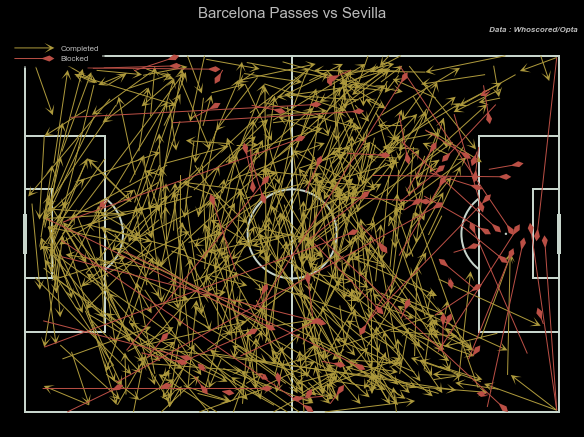

In [12]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

visuals.getTeamTotalPasses(events_df, teamId, team, opponent, pitch_color='#000000')

## Successful box passes

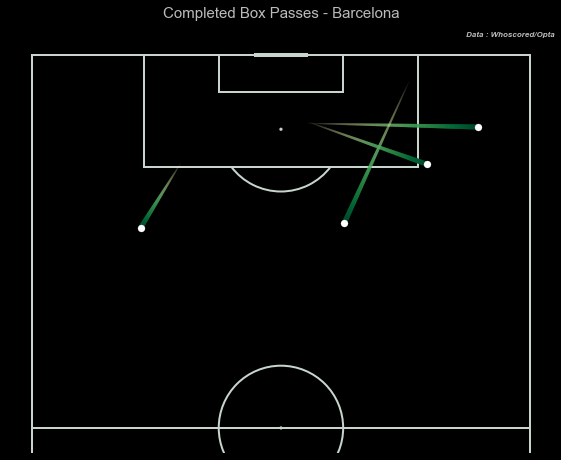

In [13]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# You can select more cmaps here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# opp_transparent/opp_comet are manually added by me to this visual, you can change it in visuals.py
# If you get an error regarding 'opp_transparent/opp_comet' you probably haven't replaced pitch.py/linecollection.py file
visuals.getTeamSuccessfulBoxPasses(events_df, teamId, team, pitch_color='#000000', cmap='YlGn')

## All passes network

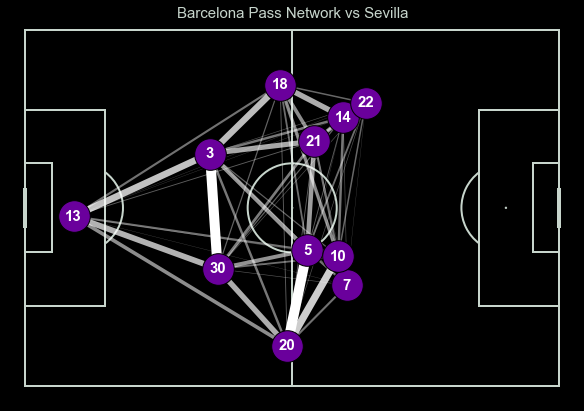

In [14]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Create Pass Network     
# you can change marker_label to 'name' as well
visuals.createPassNetworks(match_data, matches_df, events_df, team='Barcelona',
                           pitch_color='#000000', max_lw=10, marker_size=1000, 
                           marker_color='#6a009c', marker_label='kit_no', marker_label_size=15) 

## Progressive passes network

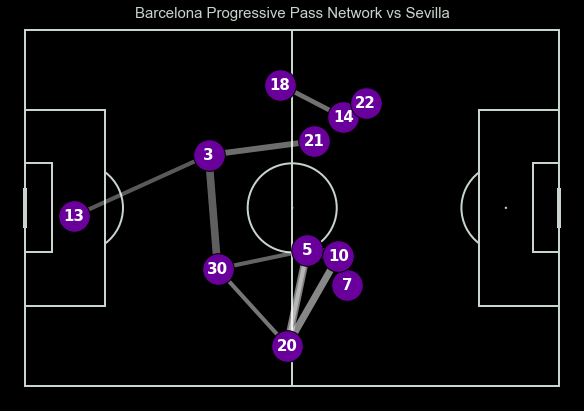

In [15]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Create Progressive Pass Network
# you can change marker_label to 'name' as well
visuals.createAttPassNetworks(match_data, matches_df, events_df, team='Barcelona', 
                              pitch_color='#000000', max_lw=10, marker_size=1000, 
                              marker_color='#6a009c', marker_label='kit_no', marker_label_size=15)

# Get shotmap

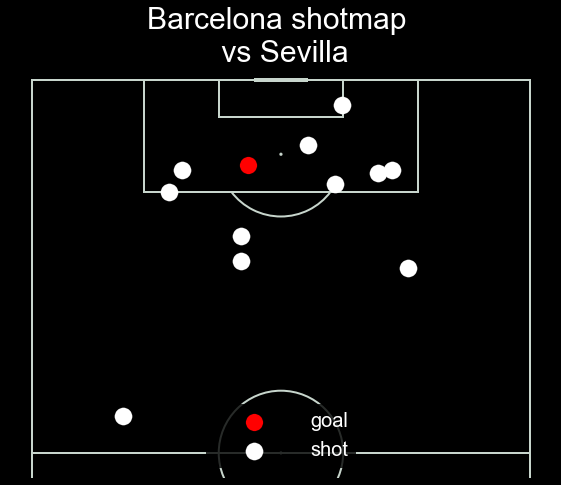

In [16]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

visuals.createShotmap(match_data, events_df, team=team, pitchcolor='black', shotcolor='white',
                      goalcolor='red', titlecolor='white', legendcolor='white', marker_size=300)

# Get PV formation map

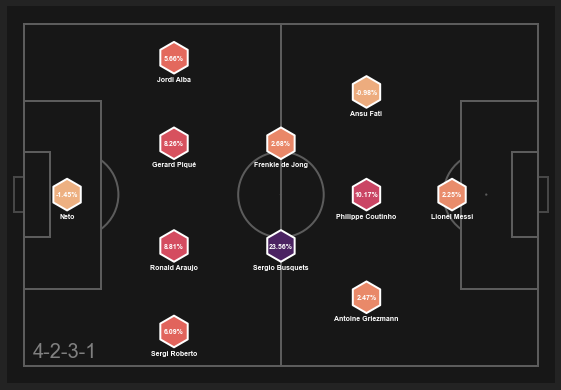

In [17]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Choose your color palette from here: https://seaborn.pydata.org/tutorial/color_palettes.html
visuals.createPVFormationMap(match_data, events_df, team=team, color_palette=sns.color_palette("flare", as_cmap=True),
                             markerstyle='h', markersize=1000, markeredgewidth=2, labelsize=7, labelcolor='w')